# Tratamento da coluna 'empreendimento' da base de empreendimento

A coluna 'empreendimento' contém o nome do empreendimento. Como não temos uma coluna que categorize os empreendimentos, vamos usar essa coluna de nome para extrair as categorias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import nltk
import re
from unidecode import unidecode

nltk.download('stopwords')
from nltk.corpus import stopwords

from wordcloud import WordCloud

pasta_dados = '../dados/'

df_empreend = pd.read_csv(pasta_dados + 'tratados/simu_carteira_empreendimentos_nulos_tratados.csv')
df_empreend

[nltk_data] Downloading package stopwords to /home/oem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cod_mdr,cod_operacao,cod_saci,cod_convenio_siafi,cod_ag_operador,origem,dsc_concedente,dsc_fonte,dsc_unidade,cod_proposta,...,mun_AMAZONIA,mun_FRONTEIRA,mun_CAPITAL,uf_CODIGO_UF,mun_LATITUDE,mun_LONGITUDE,mun_ALTITUDE,mun_AREA,mun_codigo_adotado,uf_NOME_UF
0,1-38001,319910.0,38001.0,0.0,375658.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,N,N,S,26.0,-8.054,-34.881,4.0,217494.0,261160.0,PERNAMBUCO
1,1-38002,319912.0,38002.0,0.0,375664.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,N,N,S,26.0,-8.054,-34.881,4.0,217494.0,261160.0,PERNAMBUCO
2,1-38003,319914.0,38003.0,0.0,375666.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,N,N,S,26.0,-8.054,-34.881,4.0,217494.0,261160.0,PERNAMBUCO
3,1-38004,354485.0,38004.0,0.0,NaN,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1-38005,345051.0,38005.0,0.0,377438.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,N,N,N,35.0,-21.209,-50.433,390.0,1167311.0,350280.0,SAO PAULO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71243,4-603771,603795.0,0.0,0.0,603771.0,NPAC_FGTS,MINISTERIO DAS CIDADES,FIN,SMDRU-DEMOB,NaN,...,N,N,S,29.0,-12.971,-38.511,8.0,706799.0,292740.0,BAHIA
71244,4-603772,603796.0,0.0,0.0,603772.0,NPAC_FGTS,MINISTERIO DAS CIDADES,FIN,SMDRU-DEMOB,NaN,...,N,N,S,29.0,-12.971,-38.511,8.0,706799.0,292740.0,BAHIA
71245,4-603787,603794.0,0.0,0.0,603787.0,NPAC_FGTS,MINISTERIO DAS CIDADES,FIN,SMDRU-DEMOB,NaN,...,N,N,S,29.0,-12.971,-38.511,8.0,706799.0,292740.0,BAHIA
71246,4-603797,603798.0,0.0,0.0,603797.0,NPAC_FGTS,MINISTERIO DAS CIDADES,FIN,SMDRU-DEMOB,NaN,...,N,N,S,29.0,-12.971,-38.511,8.0,706799.0,292740.0,BAHIA


In [2]:
def trata_texto(texto):
    """
    Função para tratar um texto em português. Realiza as seguintes operações:
    1. Remove acentos.
    2. Converte o texto para minúsculas.
    3. Remove apóstrofos e substitui hífens por espaços.
    4. Substitui espaços duplos por um único espaço.
    5. Remove as palavras de parada (stopwords) do português.

    Parâmetros:
    texto (str): O texto a ser tratado.

    Retorna:
    str: O texto tratado.

    """
    sem_acentos = unidecode(texto).lower().replace("'", "").replace("-", " ").strip() if pd.notnull(texto) else texto
    sem_espacos_duplos = re.sub(r'\s+', ' ', sem_acentos).strip()
    sw = stopwords.words('portuguese')
    texto_processado = ' '.join([palavra for palavra in sem_espacos_duplos.split(" ") if palavra not in sw])
    return texto_processado if texto_processado else None

In [3]:
def plota_nuvem_de_palavras(df_parametro, palavras_excluidas = None, empreendimento = True):
    df = df_parametro.copy()
    if empreendimento:
        contagem  = df.empreendimento.str.split().explode('empreendimento').apply(lambda x: trata_texto(x)).value_counts()
    else: 
        contagem = df['new_empreend'].str.split(',').explode().value_counts()

    contagem_dict = dict(zip(contagem.index, contagem.values))

    # Remove palavras em palavras_excluidas do dicionário de contagem
    if palavras_excluidas:
        for palavra in palavras_excluidas:
            contagem_dict.pop(palavra, None)

    wordcloud = WordCloud(random_state=65)
    wordcloud.generate_from_frequencies(frequencies = contagem_dict)

    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear') # plotagem da nuvem de palavras
    plt.axis('off') # remove as bordas
    plt.show()

    return contagem

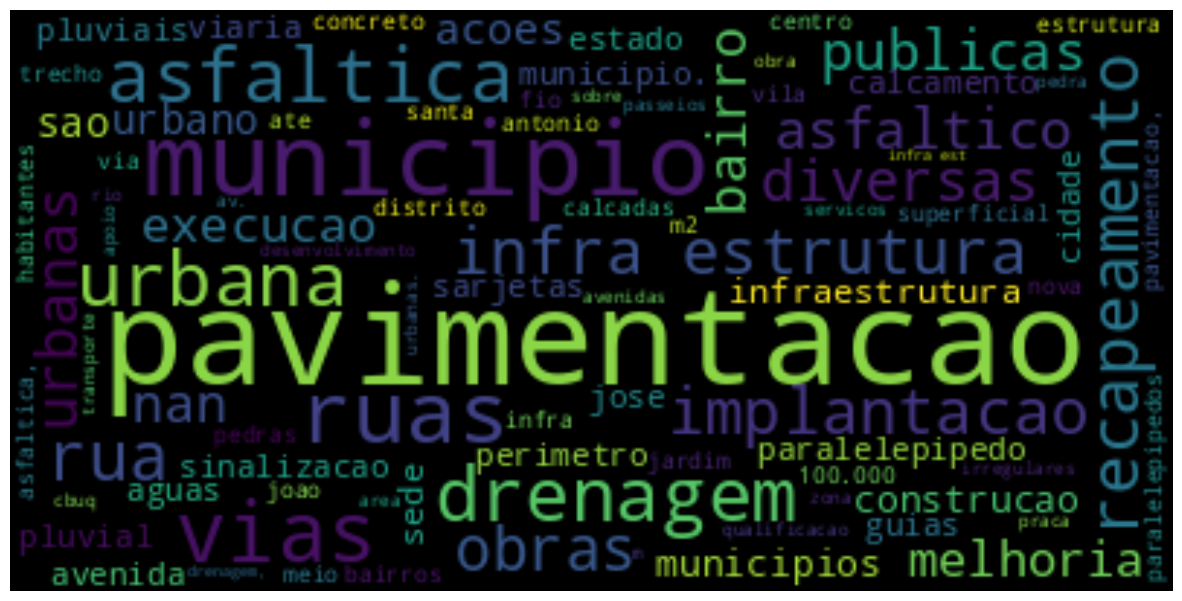

In [4]:
# Plota nuvem de palavras da coluna de empreendimento, após tratamento do texto (acentos, pontuacao, etc)
contagem = plota_nuvem_de_palavras(df_empreend)

In [5]:
contagem

pavimentacao               42616
municipio                  22834
ruas                       15318
vias                       14329
drenagem                   10871
                           ...  
calcadas/acessibilidade        1
coopericom                     1
viaria;                        1
semaforica;                    1
passarelas;                    1
Name: empreendimento, Length: 40090, dtype: int64

In [6]:
coluna_empreendimento = 'empreendimento'
df_empreend[coluna_empreendimento]

0        IMPLANTACAO DO TRANSPORTE RAPIDO POR ONIBUS NO...
1                 CONSTRUCAO DO TERMINAL DE COSME E DAMIAO
2        IMPLANTA«ŸO DO TRANSPORTE RAPIDO POR ONIBUS NO...
3                                                      NAN
4        PAVIMENTACAO E QUALIFICACAO DE VIAS URBANAS, C...
                               ...                        
71243    REFROTA 17 RENOVACAO DO SISTEMA DE TRANSPORTE ...
71244    REFROTA 17 RENOVACAO DO SISTEMA DE TRANSPORTES...
71245    PRO - TRANSPORTES - REFROTA 17   AQUSICAO DE C...
71246    REFROTA 17 RENOVACAO DO SISTEMA DE TRANSPORTES...
71247    REFROTA17 RENOVACAO DO SISTEMA DE TRANSPORTES ...
Name: empreendimento, Length: 71248, dtype: object

In [7]:
df_empreend[coluna_empreendimento].isna().sum()

0

Não há valores de nome vazios, mas verificamos que há ocorrências de strings como 'NAN' e 'XXXX..XXXX' que foram usadas para preencher.

In [8]:
df_empreend[df_empreend[coluna_empreendimento]=='NAN'].shape

(4507, 91)

In [9]:
df_empreend[df_empreend[coluna_empreendimento].str.contains('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')].shape

(601, 91)

Vamos filtrar esses valores, antes de tratarmos as categorias de empreendimentos

In [10]:
# Obs: Código comentado após o tratamento para que o dataframe final possua todas as linhas de empreendimento

# df_empreend = df_empreend[df_empreend[coluna_empreendimento] != "NAN"]
# df_empreend = df_empreend[~df_empreend[coluna_empreendimento].str.contains('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX', na=False)]
# df_empreend.shape

In [11]:
def trata_df_emprend(df, keywords, mostrar_colunas_novas=True):
    """
    Esta função processa um DataFrame de empreendimentos, procurando por palavras-chave específicas nos empreendimentos e criando novas colunas com base nessas palavras-chave.

    Parâmetros:
    df (pandas.DataFrame): DataFrame de entrada que contém os dados dos empreendimentos.
    keywords (dict): Dicionário onde as chaves são as palavras-chave a serem procuradas e os valores são listas de sinônimos dessas palavras-chave.
    mostrar_colunas_novas (bool, opcional): Se True, retorna o DataFrame original com as novas colunas adicionadas. Se False, retorna o DataFrame sem as colunas auxiliares criadas durante o processamento.

    Retorna:
    pandas.DataFrame: DataFrame processado com as novas colunas adicionadas.

    """

    # Para cada palavra-chave e seus sinônimos
    for key, values in keywords.items():
        # Cria uma nova coluna no DataFrame para essa palavra-chave
        df[f'aux_emp_{key.lower().replace(" ", "_")}'] = df['empreendimento'].apply(
            lambda x: key if any(re.search(v, x, re.IGNORECASE) for v in values) else np.nan
        )

    # Cria uma nova coluna 'new_empreend' que é a junção das colunas auxiliares criadas
    df['new_empreend'] = df.filter(like='aux_emp_').apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

    # Se mostrar_colunas_novas for True, retorna o DataFrame com todas as colunas
    if mostrar_colunas_novas:
        return df

    # Se mostrar_colunas_novas for False, retorna o DataFrame sem as colunas auxiliares
    return df.loc[:, ~df.columns.str.startswith('aux')]


In [12]:
keywords = {
    'METRO': ['METR'],
    'PAVIMENTACAO': ['PAV', 'PAPV'],
    'REFROTA': ['FROTA'],
    'SINALIZACAO': ['SINAL', 'SEMAF'],
    'CALCAMENTO': ['CALCAM'],
    'CICLOVIA': ['CICLO'],
    'CORREDOR': ['CORREDOR', 'FAIXA EXCLUSIVA'],
    'DRENAGEM': ['DRENA'],
    'FERROVIA': ['FERROV', 'TRILH'],
    'RAPIDO': ['BRT', 'RAPIDO'],
    'VLT': ['VLT'],
    'RECAPEAMENTO': ['RECAP'],
    'AEROPORTO': ['AERO'],
    'REVITALIZACAO': ['REVIT'],
    'SARJETA': ['SARJETA', 'SARGETA'],
    'CALCADAS': ['CALCADA', 'PASSEIO'],
    'PRACA': ['PRACA'],
    'TERMINAL': ['TERMINAL', "TERMINAIS"],
    'ASFALTO': ['ASFALT'],
    'PONTE': ['PONTE'],
    'PARQUE': ['PARQUE'],
    'ONIBUS': ['ONIBUS'],
}


df_trat = trata_df_emprend(df_empreend.copy(), keywords)
df_trat[['empreendimento', 'new_empreend']]

,empreendimento,new_empreend
0,IMPLANTACAO DO TRANSPORTE RAPIDO POR ONIBUS NO...,"CORREDOR,RAPIDO,TERMINAL,ONIBUS"
1,CONSTRUCAO DO TERMINAL DE COSME E DAMIAO,TERMINAL
2,IMPLANTA«ŸO DO TRANSPORTE RAPIDO POR ONIBUS NO...,"CORREDOR,RAPIDO,ONIBUS"
3,NAN,
4,"PAVIMENTACAO E QUALIFICACAO DE VIAS URBANAS, C...","PAVIMENTACAO,CALCAMENTO,DRENAGEM,PARQUE"
...,...,...
71243,REFROTA 17 RENOVACAO DO SISTEMA DE TRANSPORTE ...,REFROTA
71244,REFROTA 17 RENOVACAO DO SISTEMA DE TRANSPORTES...,REFROTA
71245,PRO - TRANSPORTES - REFROTA 17 AQUSICAO DE C...,"REFROTA,ONIBUS"
71246,REFROTA 17 RENOVACAO DO SISTEMA DE TRANSPORTES...,REFROTA


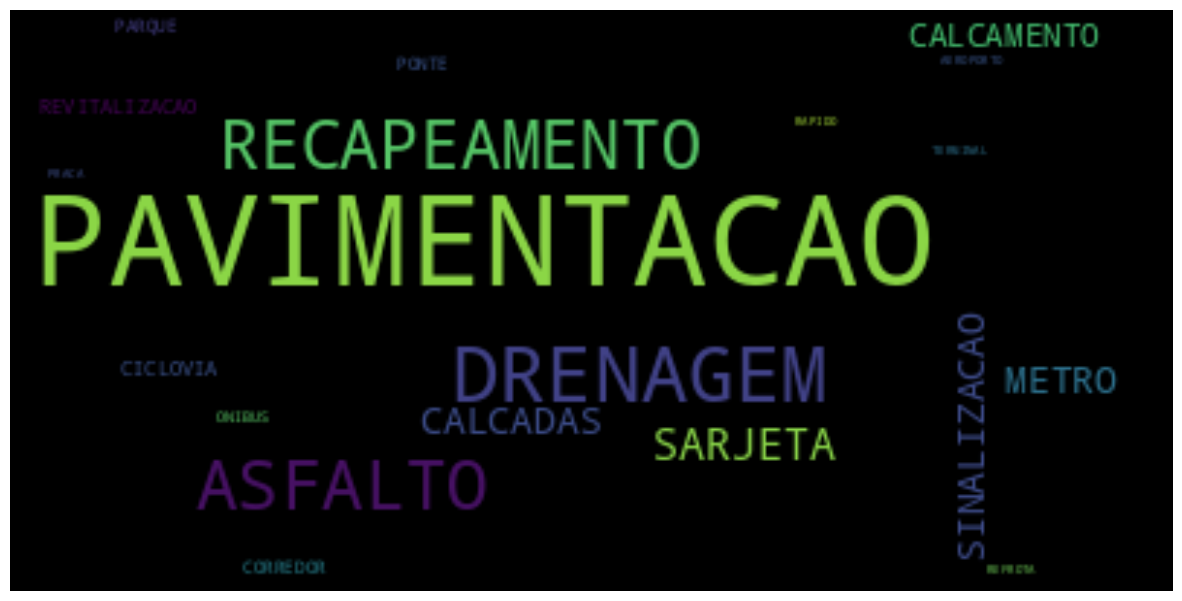

In [13]:
contagem = plota_nuvem_de_palavras(df_trat, empreendimento = False)

In [14]:
contagem

PAVIMENTACAO     46581
                 13647
DRENAGEM         12228
ASFALTO           9541
RECAPEAMENTO      8737
SARJETA           2986
METRO             2364
CALCADAS          2187
SINALIZACAO       2122
CALCAMENTO        1344
CICLOVIA           458
REVITALIZACAO      412
PONTE              345
PARQUE             336
CORREDOR           297
ONIBUS             212
PRACA              150
TERMINAL           116
REFROTA             92
AEROPORTO           87
RAPIDO              68
FERROVIA            34
VLT                 26
Name: new_empreend, dtype: int64

In [15]:
count_unico = {}

for key in keywords:
    count_unico[key] = len(df_trat[df_trat['new_empreend'] == key]['empreendimento'])

dict(sorted(count_unico.items(), key=lambda item: item[1]))

{'AEROPORTO': 9,
 'FERROVIA': 11,
 'VLT': 11,
 'PRACA': 29,
 'SARJETA': 37,
 'RAPIDO': 43,
 'TERMINAL': 52,
 'REFROTA': 53,
 'ONIBUS': 53,
 'PARQUE': 65,
 'PONTE': 107,
 'ASFALTO': 134,
 'CORREDOR': 140,
 'DRENAGEM': 152,
 'SINALIZACAO': 200,
 'CICLOVIA': 257,
 'REVITALIZACAO': 283,
 'METRO': 305,
 'CALCADAS': 627,
 'CALCAMENTO': 793,
 'RECAPEAMENTO': 4013,
 'PAVIMENTACAO': 24355}

In [16]:
sem_categoria = df_trat[(df_trat['new_empreend'] == '')][['empreendimento']]

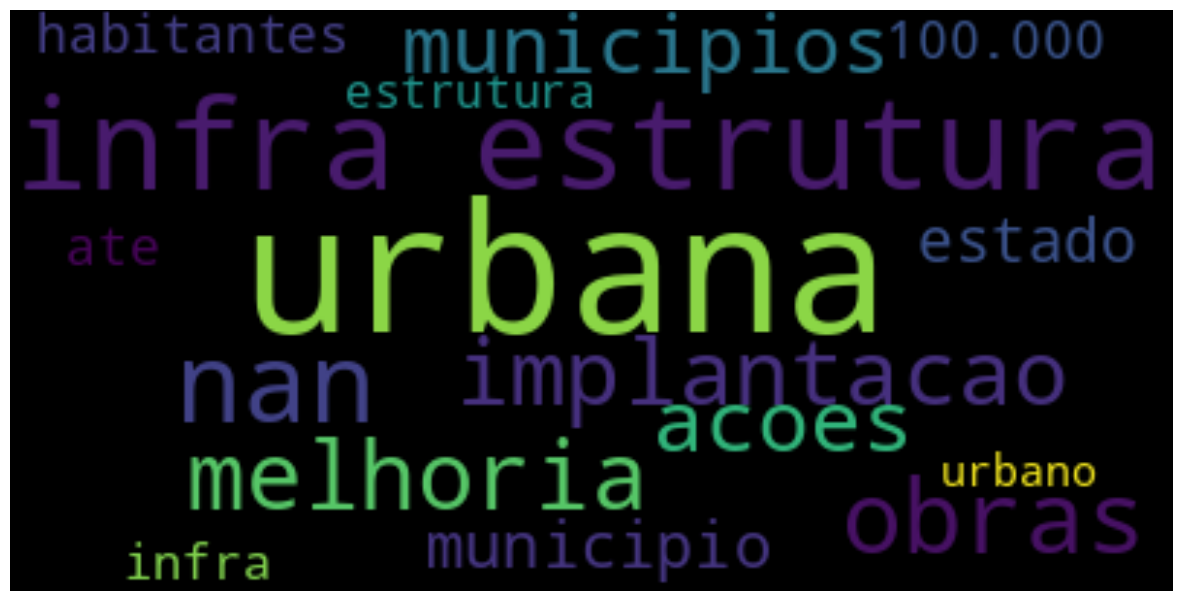

urbana              6717
infra estrutura     6196
nan                 4507
obras               3796
melhoria            3445
                    ... 
tupiratins             1
cascavel               1
povoados.              1
caraguatatuba sp       1
taguatinga             1
Name: empreendimento, Length: 6263, dtype: int64

In [17]:
plota_nuvem_de_palavras(sem_categoria)

In [18]:
df_trat.columns

Index(['cod_mdr', 'cod_operacao', 'cod_saci', 'cod_convenio_siafi',
       'cod_ag_operador', 'origem', 'dsc_concedente', 'dsc_fonte',
       'dsc_unidade', 'cod_proposta',
       ...
       'aux_emp_revitalizacao', 'aux_emp_sarjeta', 'aux_emp_calcadas',
       'aux_emp_praca', 'aux_emp_terminal', 'aux_emp_asfalto', 'aux_emp_ponte',
       'aux_emp_parque', 'aux_emp_onibus', 'new_empreend'],
      dtype='object', length=114)

In [19]:
df_trat.to_csv('../dados/tratados/simu_carteira_empreendimentos.csv', index=False)